<a href="https://colab.research.google.com/github/luisERH/ImageCloud/blob/main/Custom_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install wikipedia

#Importação das Bibliotecas

In [26]:
import re
import cv2
import numpy as np
import wikipedia
from PIL import Image
from pprint import pprint
from string import digits, punctuation
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

#Aquisição dos Dados


In [27]:
def clean_text(text):
    remove_digits = str.maketrans('', '', digits)
    remove_puncts = str.maketrans('', '', punctuation)
    text = text.translate(remove_digits)
    text = text.translate(remove_puncts)
    text = text.replace('\n', '')
    text = text.upper()
    return text

In [28]:
wiki = wikipedia.page('Data Science')
text = wiki.content
text = clean_text(text)
print(text)
# text = re.sub(r'==.*?==+', '', text)


DATA SCIENCE IS AN INTERDISCIPLINARY FIELD THAT USES SCIENTIFIC METHODS PROCESSES ALGORITHMS AND SYSTEMS TO EXTRACT KNOWLEDGE AND INSIGHTS FROM STRUCTURED AND UNSTRUCTURED DATA AND APPLY KNOWLEDGE AND ACTIONABLE INSIGHTS FROM DATA ACROSS A BROAD RANGE OF APPLICATION DOMAINS DATA SCIENCE IS RELATED TO DATA MINING MACHINE LEARNING AND BIG DATADATA SCIENCE IS A CONCEPT TO UNIFY STATISTICS DATA ANALYSIS INFORMATICS AND THEIR RELATED METHODS IN ORDER TO UNDERSTAND AND ANALYZE ACTUAL PHENOMENA WITH DATA IT USES TECHNIQUES AND THEORIES DRAWN FROM MANY FIELDS WITHIN THE CONTEXT OF MATHEMATICS STATISTICS COMPUTER SCIENCE INFORMATION SCIENCE AND DOMAIN KNOWLEDGE TURING AWARD WINNER JIM GRAY IMAGINED DATA SCIENCE AS A FOURTH PARADIGM OF SCIENCE EMPIRICAL THEORETICAL COMPUTATIONAL AND NOW DATADRIVEN AND ASSERTED THAT EVERYTHING ABOUT SCIENCE IS CHANGING BECAUSE OF THE IMPACT OF INFORMATION TECHNOLOGY AND THE DATA DELUGE FOUNDATIONS DATA SCIENCE IS AN INTERDISCIPLINARY FIELD FOCUSED ON EXTRACTING K

In [42]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off");


def resize(image, size, flag='W'):
    """ Valida imagens que contém a proporção de 20%/80% (similiares a medidas de um canhoto)

    Args:
        image (np.array): Imagem.
        size (int): Comprimento da Imagem.
    Returns:
        image (np.array): Imagem redimensionada.

    """
    h, w = image.shape[:2]
    orientation = w if flag == "W" else h
    resi = np.divide(size, orientation, dtype=np.float16)
    resized = cv2.resize(
        image, None, fx=resi, fy=resi, interpolation=cv2.INTER_LINEAR_EXACT
    )
    return resized

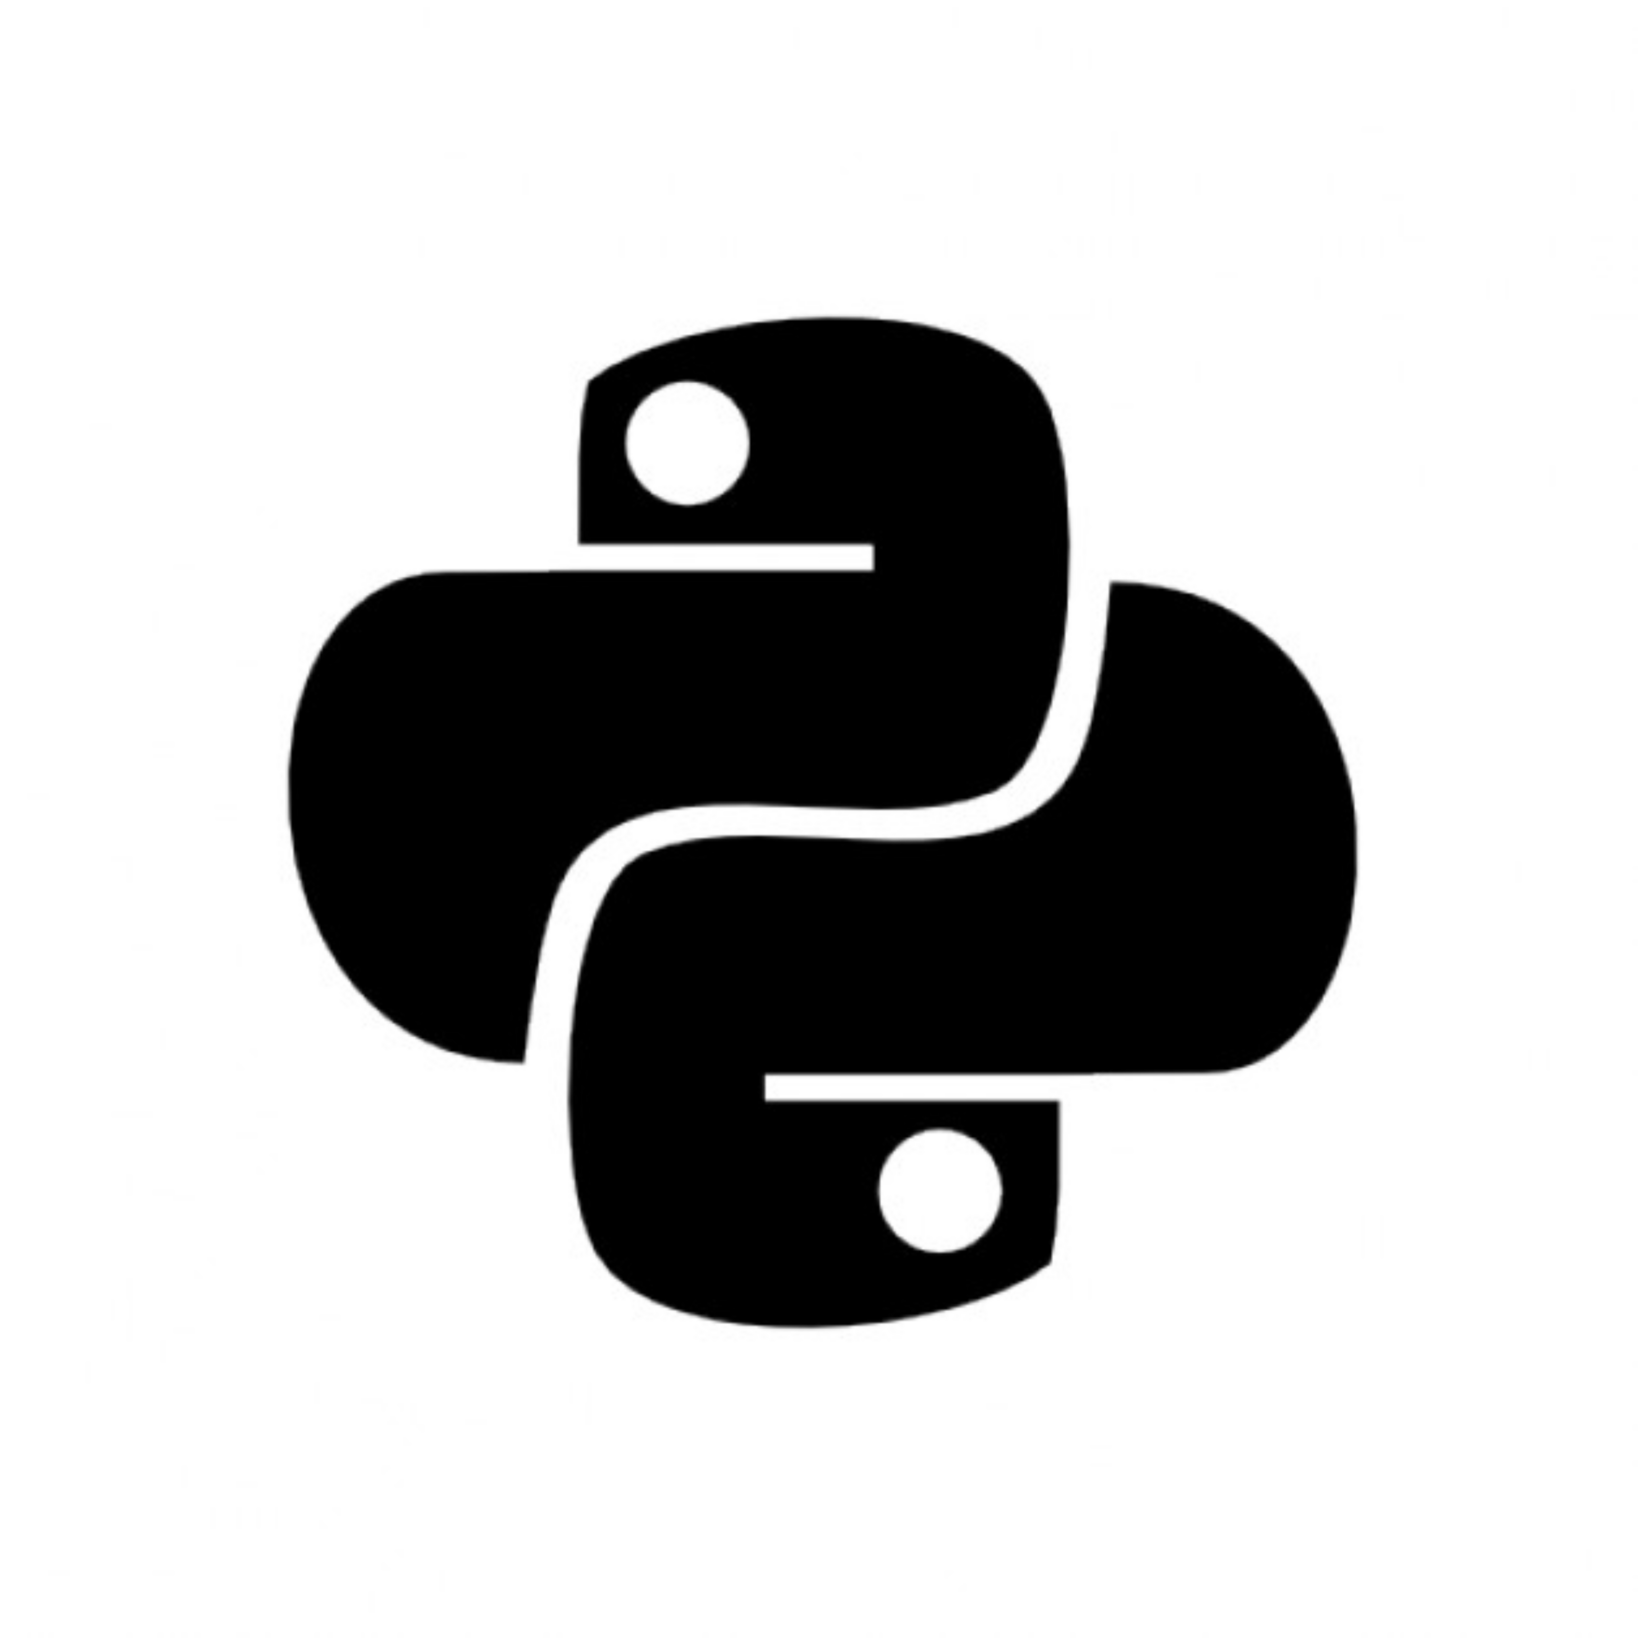

In [44]:
image = resize(cv2.imread('/content/python.png'),3000)
cv2.imwrite('/content/python_mask.png', image)
plot_cloud(image)

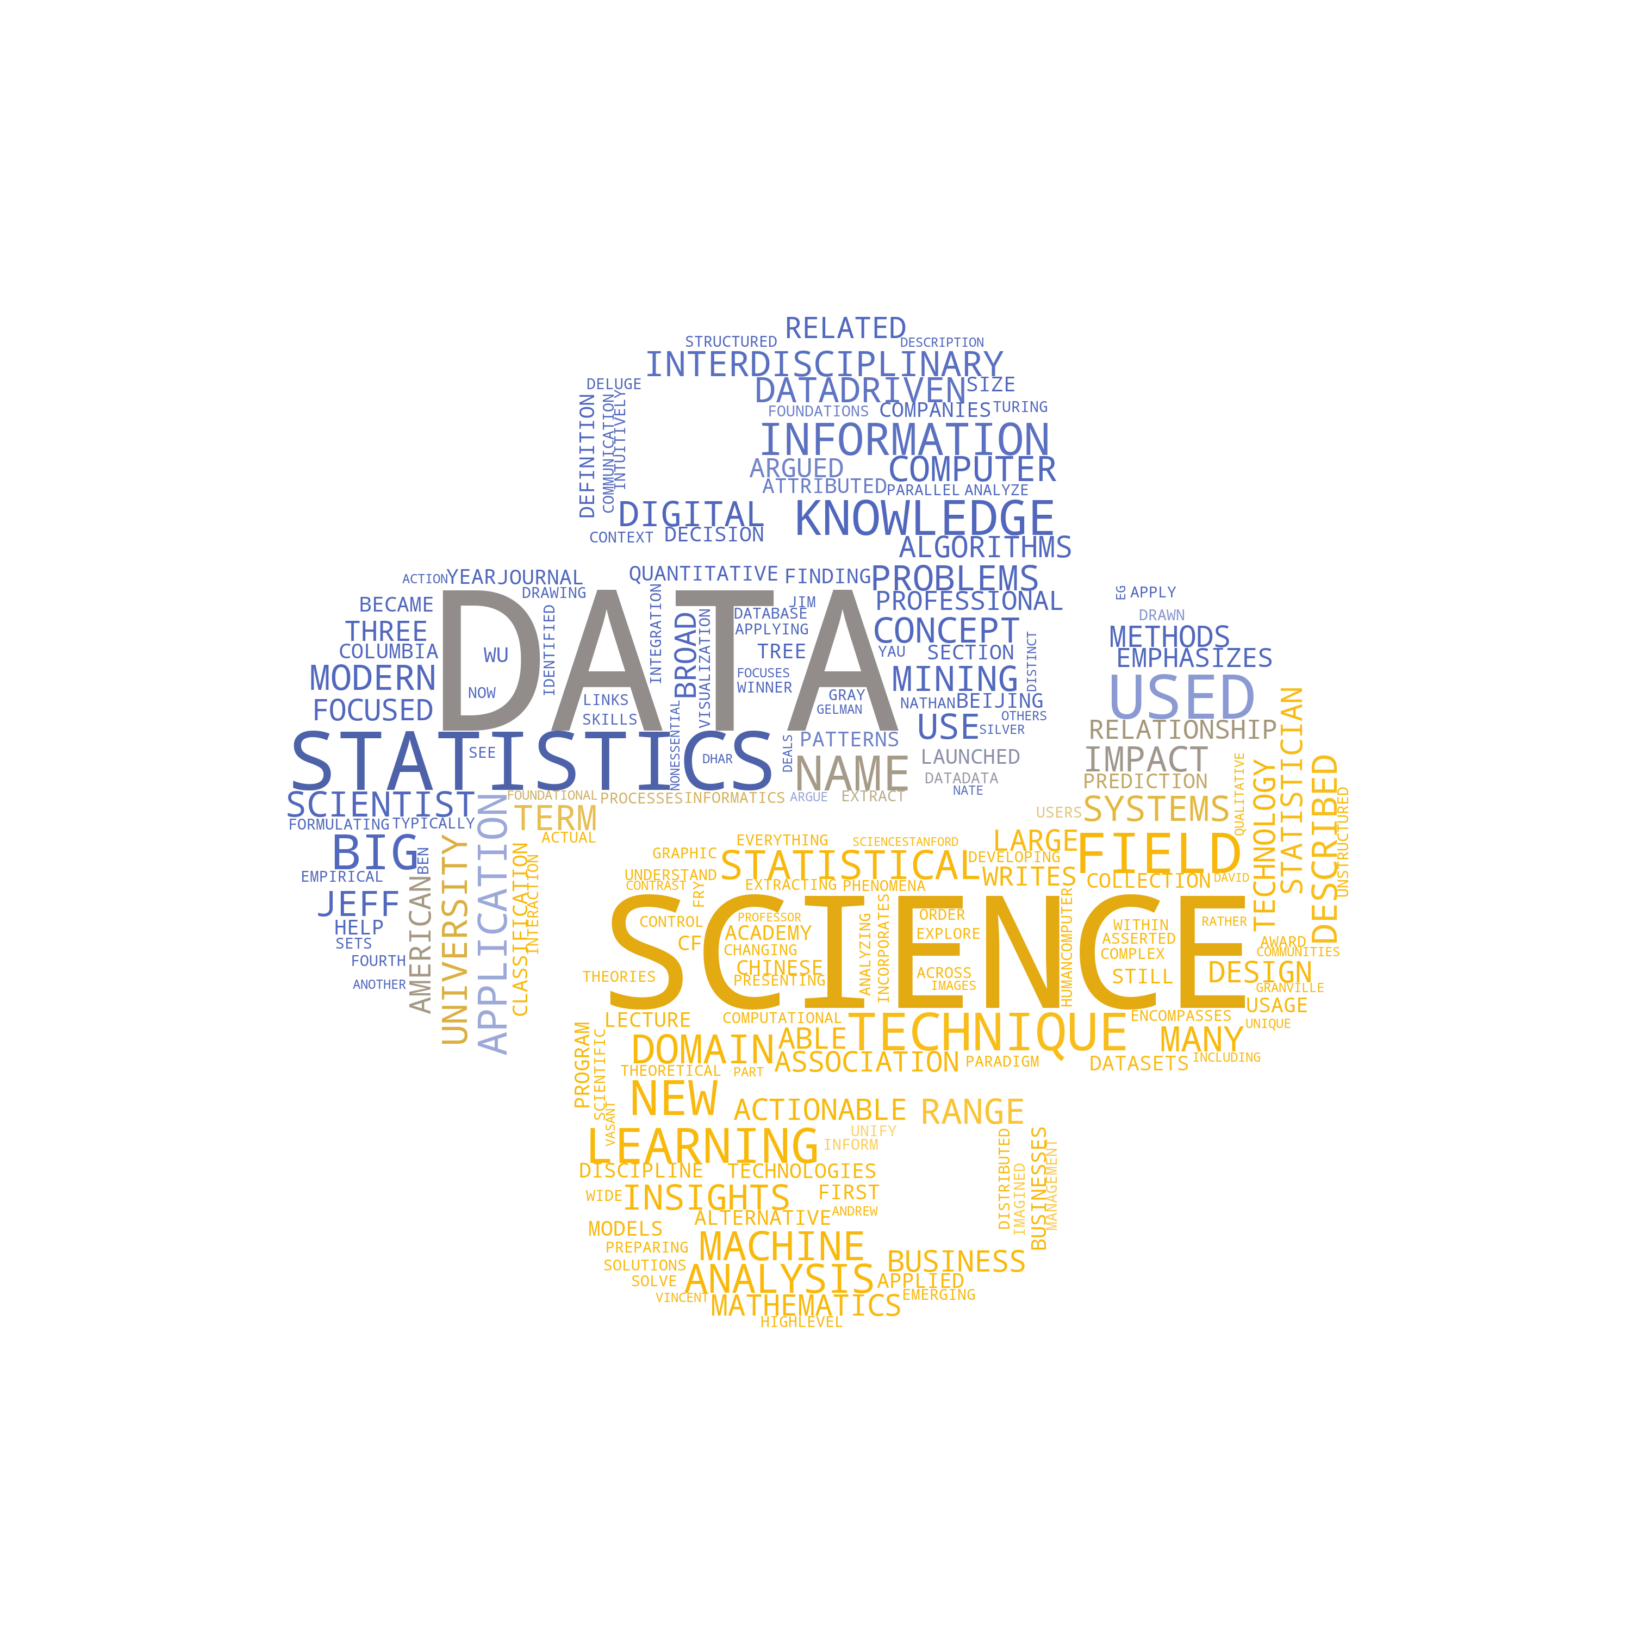

In [39]:
mask = np.array(Image.open('/content/python_mask.png'))
wordcloud = WordCloud(width = 3000,
                      height = 3000,
                      random_state=1,
                      background_color='white',
                      collocations=False,
                      stopwords = STOPWORDS,
                      mask=mask).generate(text.upper())

python_colormap  = resize(cv2.imread('/content/python_colormap2.png'),3000)
python_colormap = cv2.cvtColor(python_colormap, cv2.COLOR_BGR2RGB)
plot_cloud(wordcloud.recolor(color_func=ImageColorGenerator(python_colormap)))
wordcloud.to_file("wordcloud.png")